In [1]:
from music21 import *

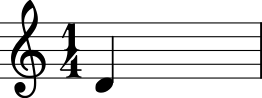

In [2]:
n = note.Note('d')
n.show('ipython.musicxml.png')

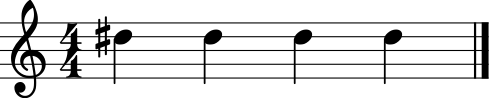

In [3]:
stream2 = stream.Stream()
n3 = note.Note('D#5') # octave values can be included in creation arguments
stream2.repeatAppend(n3, 4)
stream2.show()

In [4]:
b = corpus.parse('bwv66.6')
b.show('text')

{0.0} <music21.metadata.Metadata object at 0x10a6d54c0>
{0.0} <music21.stream.Part Soprano>
    {0.0} <music21.instrument.Instrument 'P1: Soprano: Instrument 1'>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of f# minor>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Note C#>
        {0.5} <music21.note.Note B>
    {1.0} <music21.stream.Measure 1 offset=1.0>
        {0.0} <music21.note.Note A>
        {1.0} <music21.note.Note B>
        {2.0} <music21.note.Note C#>
        {3.0} <music21.note.Note E>
    {5.0} <music21.stream.Measure 2 offset=5.0>
        {0.0} <music21.note.Note C#>
        {1.0} <music21.note.Note B>
        {2.0} <music21.note.Note A>
        {3.0} <music21.note.Note C#>
    {9.0} <music21.stream.Measure 3 offset=9.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.note.Note A>
        {0.5} <music21.note.Note B>
        {1.0} <music21.note.Note G

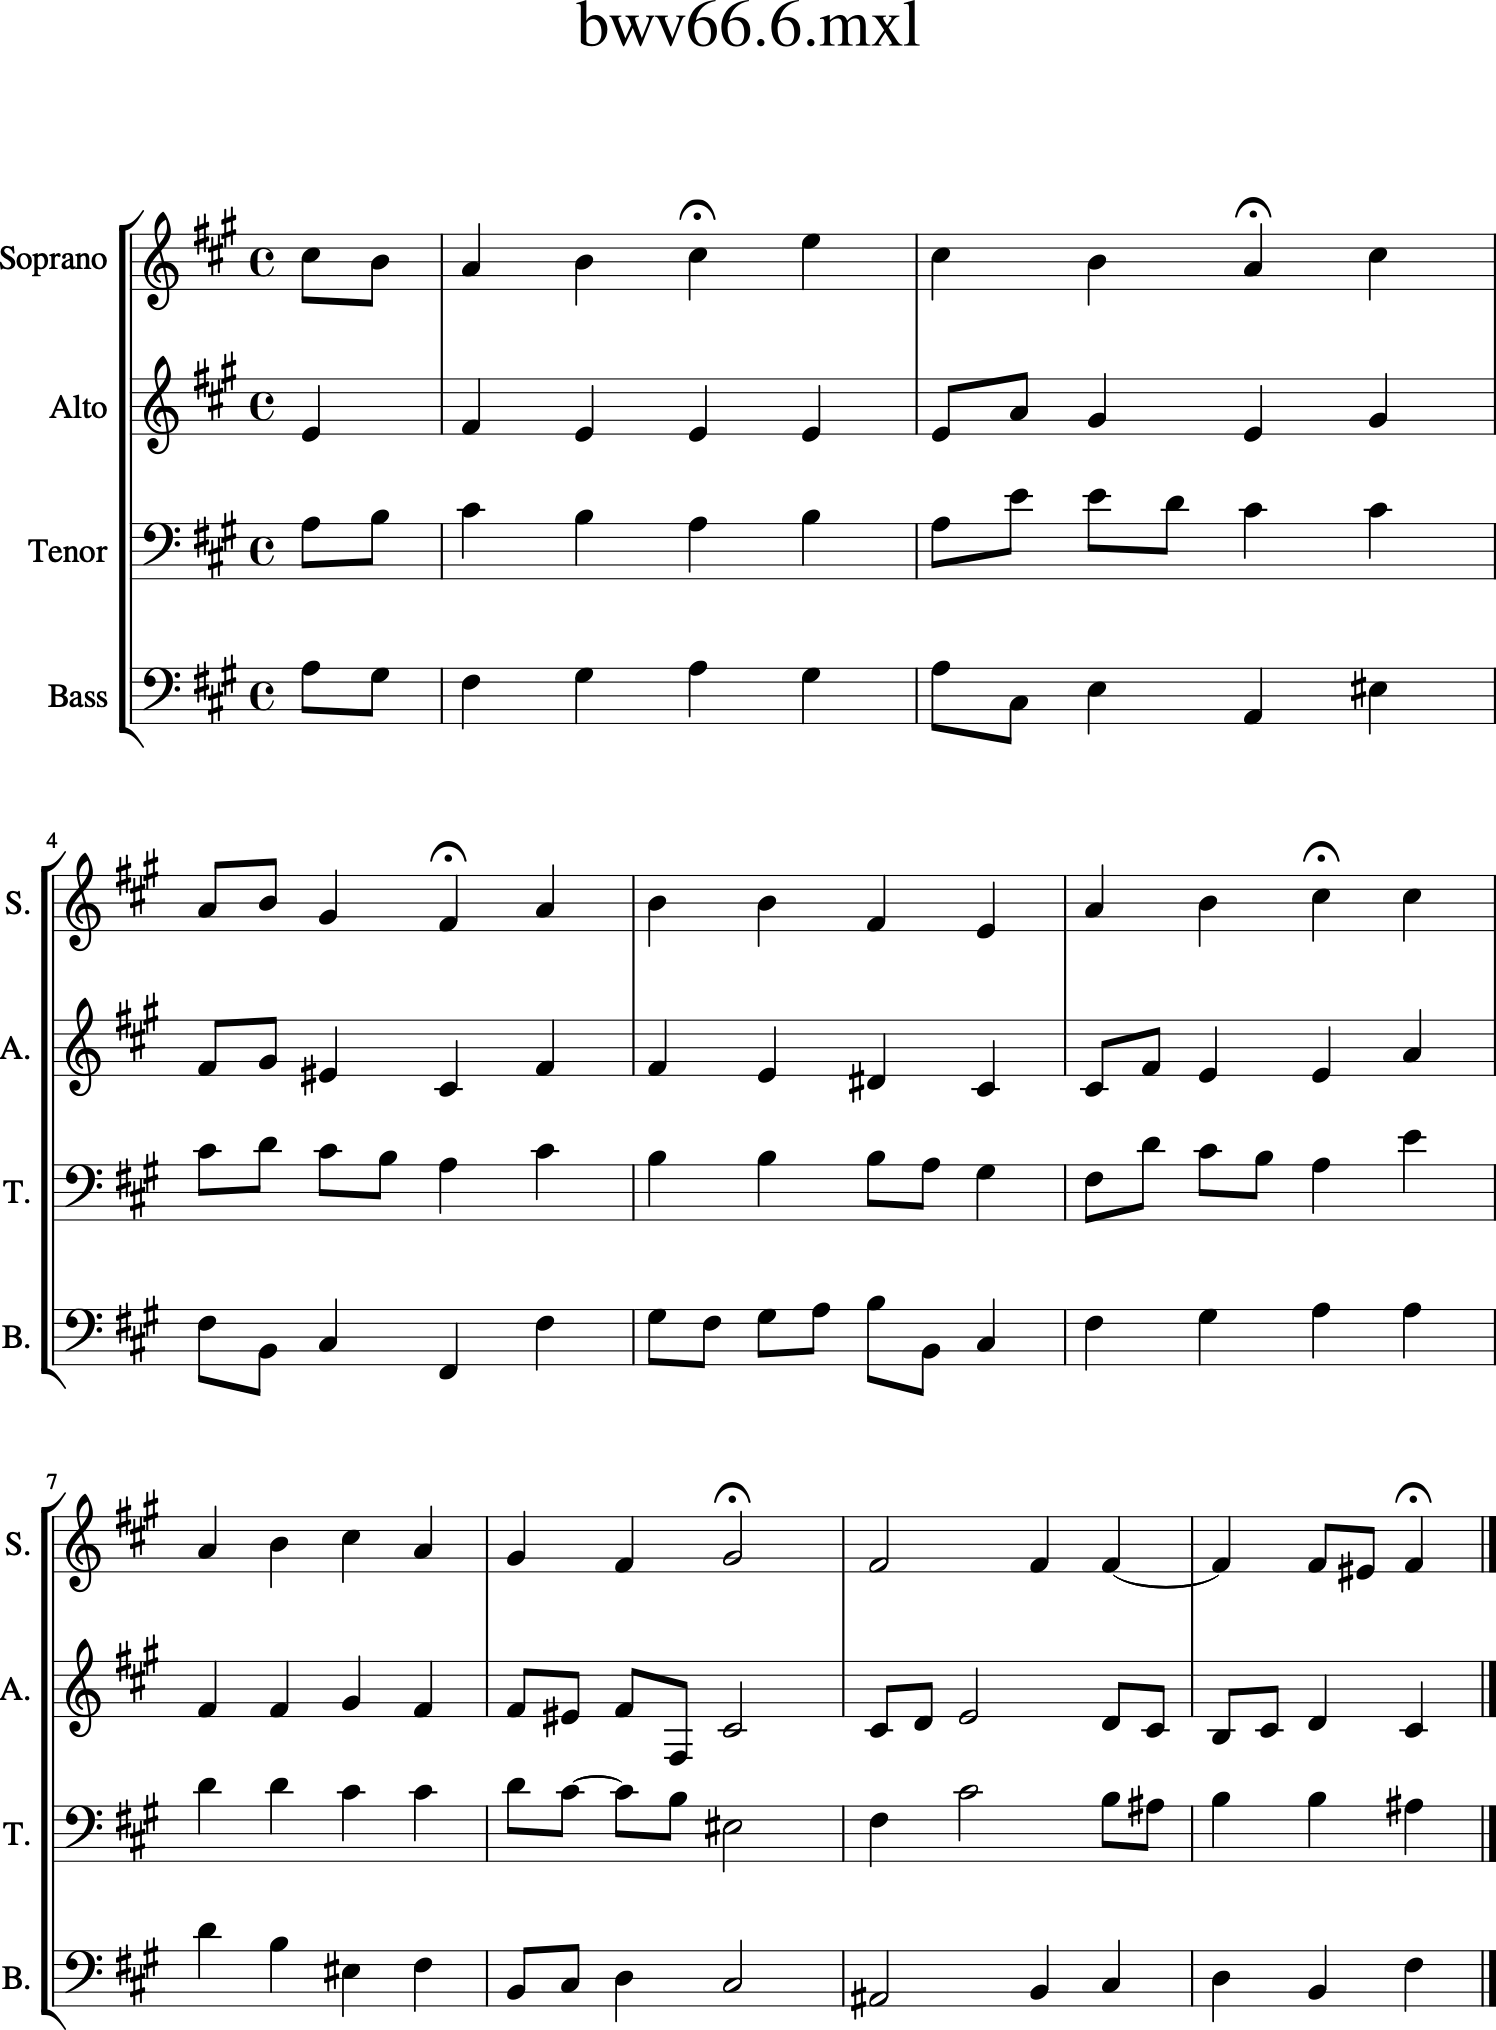

In [5]:
b = corpus.parse('bwv66.6')
b.show()

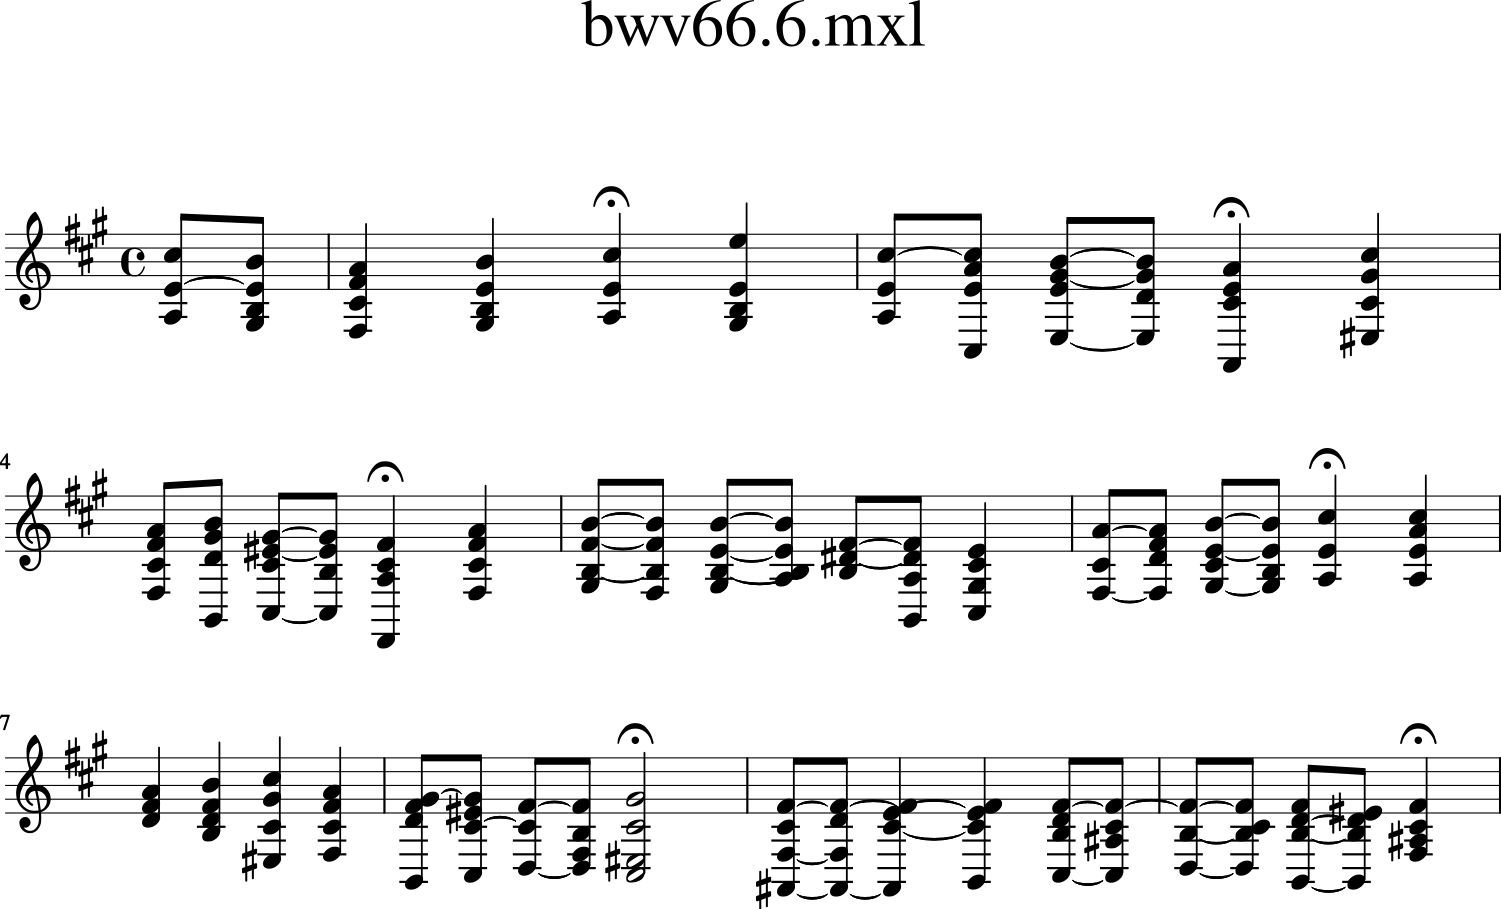

In [6]:
bChords = b.chordify()
bChords.show()

In [7]:
# Getting a feel for streams
sBach = corpus.parse('bach/bwv57.8')
sBach.show('text')

{0.0} <music21.text.TextBox "PDF © 2004...">
{0.0} <music21.text.TextBox "BWV 57.8">
{0.0} <music21.metadata.Metadata object at 0x11ab57a60>
{0.0} <music21.stream.Part Soprano>
    {0.0} <music21.instrument.Instrument 'P1: Soprano: '>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of B- major>
        {0.0} <music21.meter.TimeSignature 3/4>
        {0.0} <music21.note.Note B->
        {1.0} <music21.note.Note B->
        {2.0} <music21.note.Note F>
    {3.0} <music21.stream.Measure 2 offset=3.0>
        {0.0} <music21.note.Note D>
        {1.5} <music21.note.Note C>
        {2.0} <music21.note.Note B->
    {6.0} <music21.stream.Measure 3 offset=6.0>
        {0.0} <music21.note.Note A>
        {1.0} <music21.note.Note B->
        {1.5} <music21.note.Note A>
        {2.0} <music21.note.Note G>
        {2.5} <music21.note.Note F>
    {9.0} <music21.stream.Measure 4 offset=9.

In [16]:
soprano = sBach.parts[0].measures(0,2)
for keychange in soprano.recurse().getElementsByClass(key.Key):
    #Get key information and offset location
    print(keychange, keychange.offset)
    
    
print('-'*50)

for thisNote in soprano.recurse().getElementsByClass(note.Note):
    #Get note information and offset location
    print(thisNote)

B- major 0.0
--------------------------------------------------
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note B->


In [9]:
soprano.show('text')

{0.0} <music21.instrument.Instrument 'P1: Soprano: '>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.layout.SystemLayout>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of B- major>
    {0.0} <music21.meter.TimeSignature 3/4>
    {0.0} <music21.note.Note B->
    {1.0} <music21.note.Note B->
    {2.0} <music21.note.Note F>
{3.0} <music21.stream.Measure 2 offset=3.0>
    {0.0} <music21.note.Note D>
    {1.5} <music21.note.Note C>
    {2.0} <music21.note.Note B->


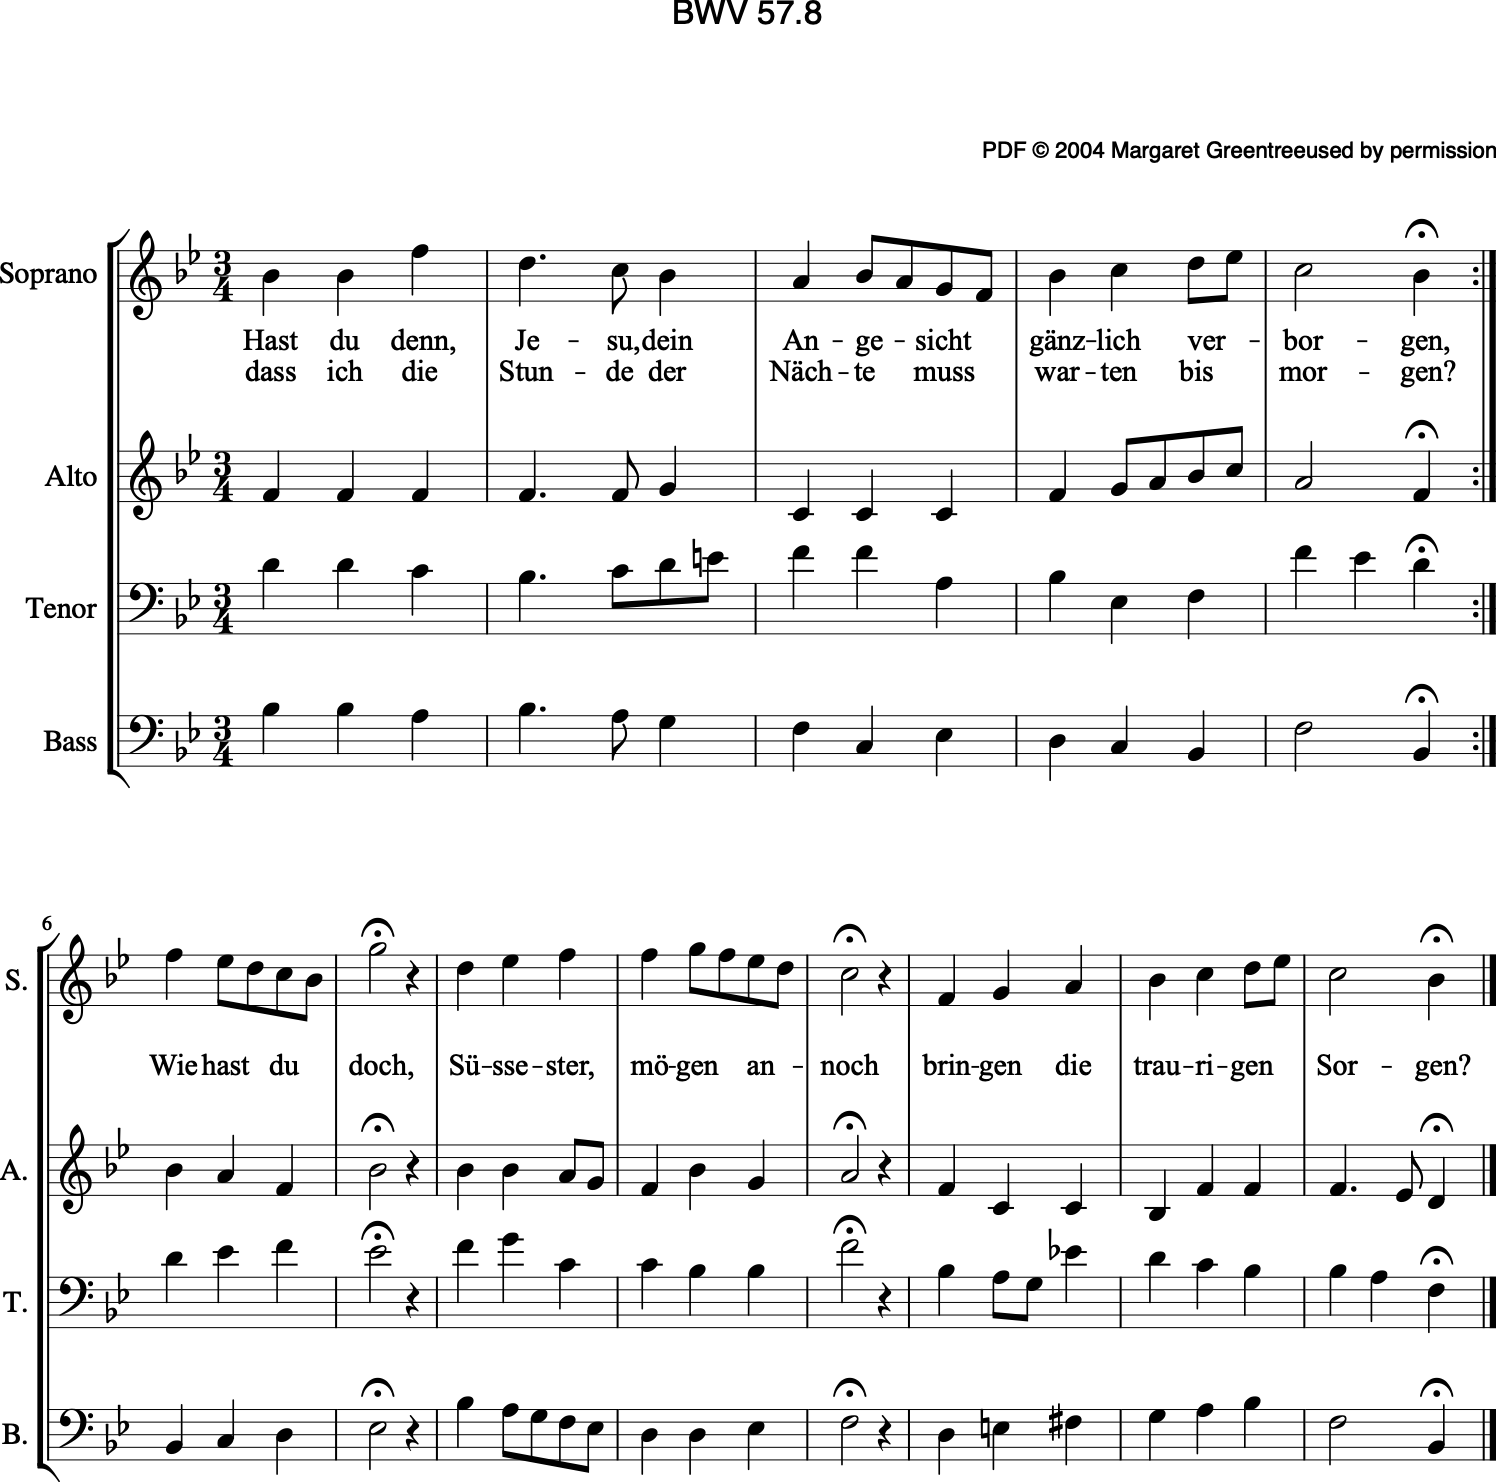

In [10]:
sBach.show()

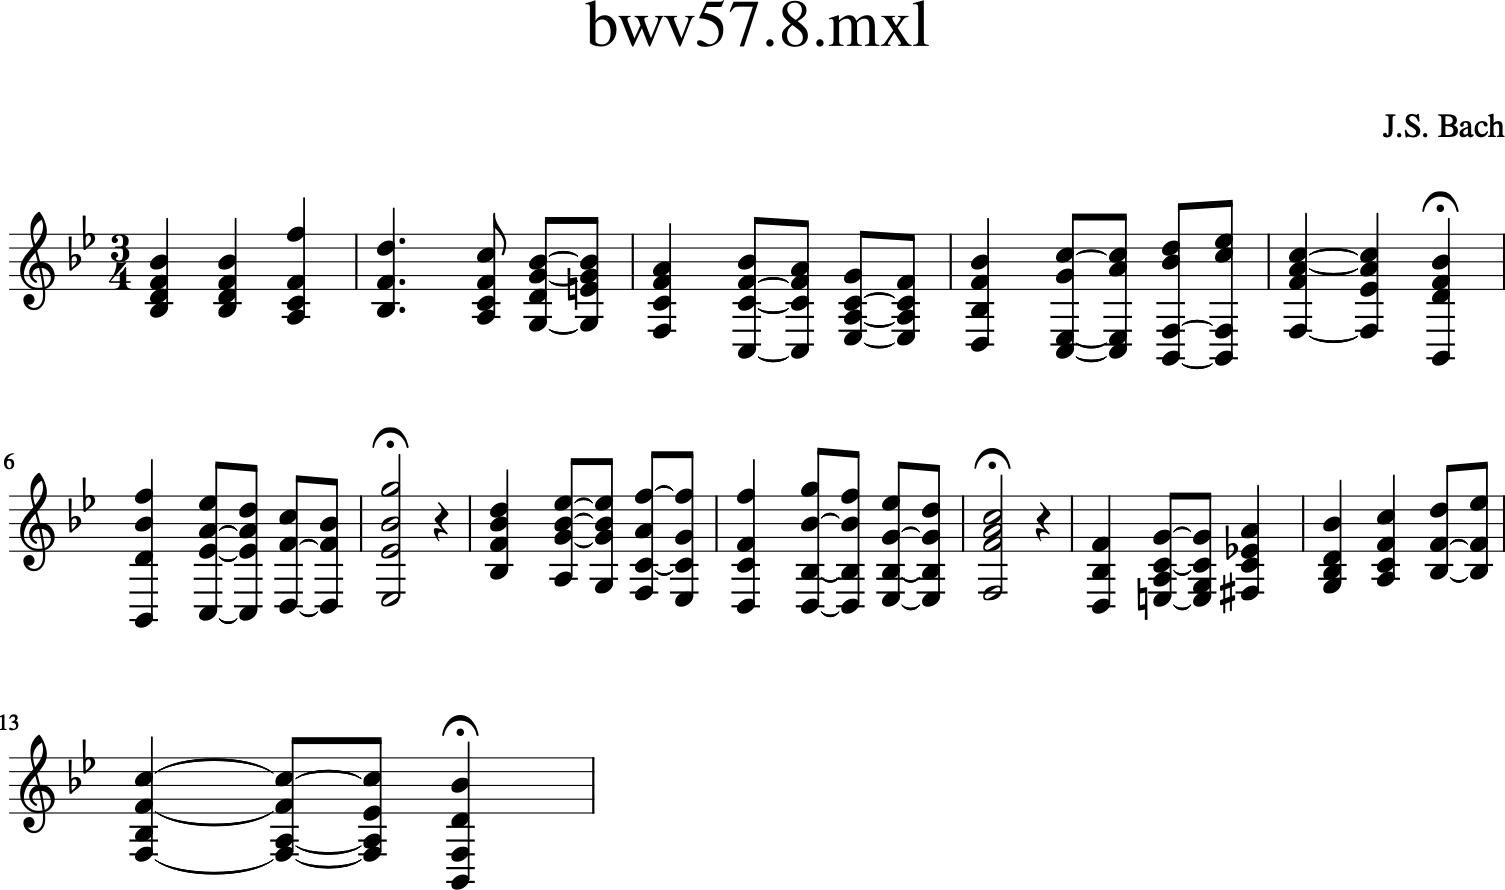

In [17]:
sChords = sBach.chordify()
sChords.show()

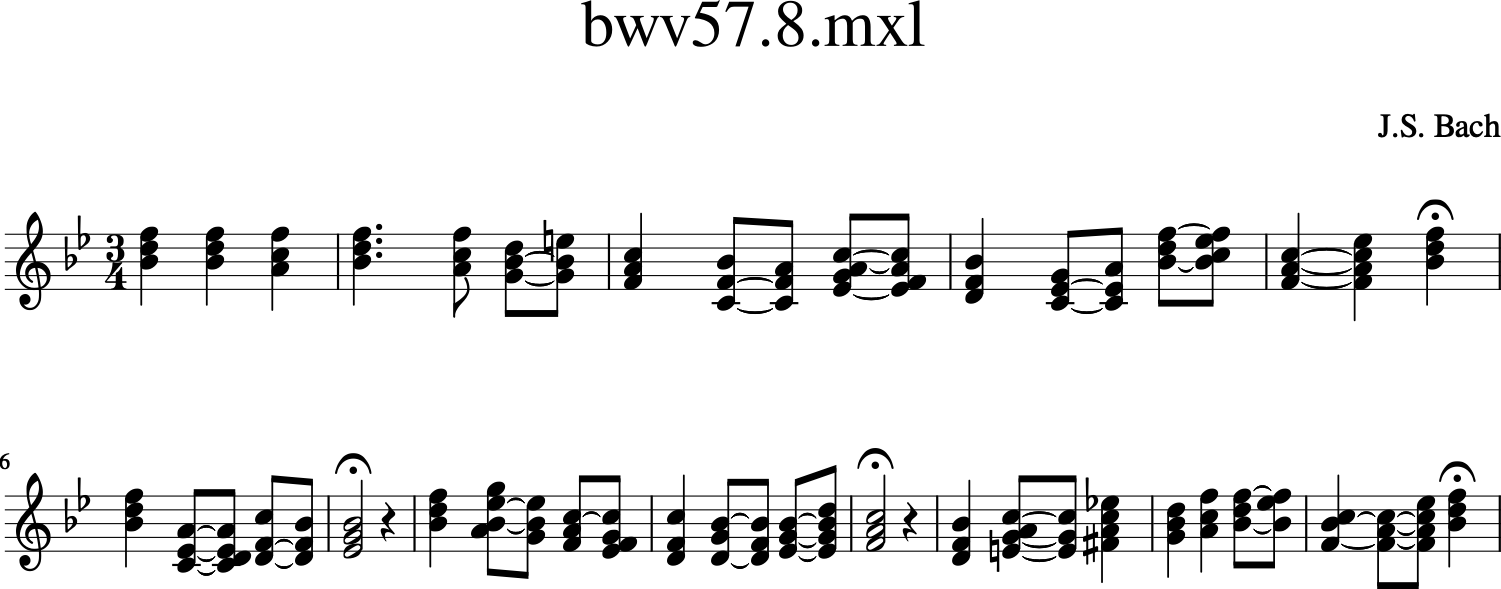

In [19]:
for c in sChords.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
    
sChords.show()

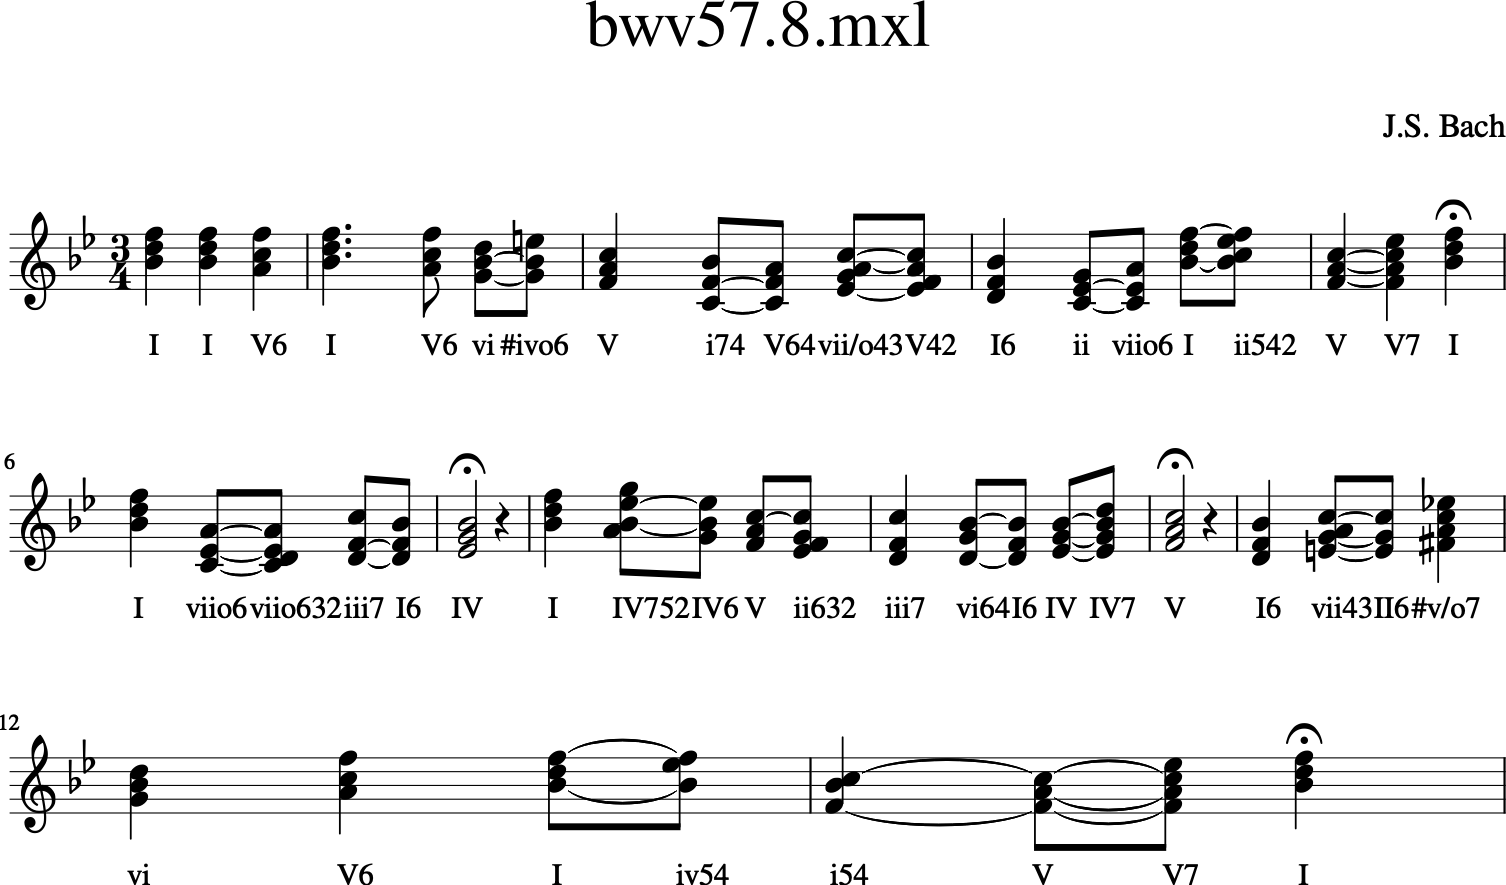

In [20]:
for c in sChords.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, key.Key('B-'))
    c.addLyric(str(rn.figure))
    
sChords.show()

In [25]:
chordList = []

for c in sChords.flat:
    if 'Chord' not in c.classes:
        continue
    print(c.lyric, end=' ')
    chordList.append(c.lyric)

I I V6 I V6 vi #ivo6 V i74 V64 vii/o43 V42 I6 ii viio6 I ii542 V V7 I I viio6 viio632 iii7 I6 IV I IV752 IV6 V ii632 iii7 vi64 I6 IV IV7 V I6 vii43 II6 #v/o7 vi V6 I iv54 i54 V V7 I 

In [26]:
print(chordList)

['I', 'I', 'V6', 'I', 'V6', 'vi', '#ivo6', 'V', 'i74', 'V64', 'vii/o43', 'V42', 'I6', 'ii', 'viio6', 'I', 'ii542', 'V', 'V7', 'I', 'I', 'viio6', 'viio632', 'iii7', 'I6', 'IV', 'I', 'IV752', 'IV6', 'V', 'ii632', 'iii7', 'vi64', 'I6', 'IV', 'IV7', 'V', 'I6', 'vii43', 'II6', '#v/o7', 'vi', 'V6', 'I', 'iv54', 'i54', 'V', 'V7', 'I']


In [28]:
chords = dict.fromkeys(chordList, 0)

for c in chordList:
    chords[c] += 1
    
chords

{'I': 9,
 'V6': 3,
 'vi': 2,
 '#ivo6': 1,
 'V': 5,
 'i74': 1,
 'V64': 1,
 'vii/o43': 1,
 'V42': 1,
 'I6': 4,
 'ii': 1,
 'viio6': 2,
 'ii542': 1,
 'V7': 2,
 'viio632': 1,
 'iii7': 2,
 'IV': 2,
 'IV752': 1,
 'IV6': 1,
 'ii632': 1,
 'vi64': 1,
 'IV7': 1,
 'vii43': 1,
 'II6': 1,
 '#v/o7': 1,
 'iv54': 1,
 'i54': 1}